# Exercises 12: Machine Learning (2)

The main topic of these exercises is the Deep Neural Network, which is basically what we explored in Exercises 11 but with several hidden layers and neurons in each layer.

While last time we learned how to use Supervised Learning on functions regression, in the following exercises we are going instead to face a classification problem: train DNNs to recognise the ten handwritten digits (0-9). Using Keras, we are provided of the MNIST dataset: 70000 handwritten digits, represented in a square pixel grid 28×28 and each pixel can take on 256 gradation of the gray color.

## 12.1) Testing optimizers

The first exercise focuses of look at the performances of the trained models refered to different optimizers.

### Data & NN structure set up

In [140]:
import tensorflow as tf
from tensorflow import keras
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import matplotlib.pyplot as plt
import json

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

def printscore(score):
    print('*******************************************************')
    print('Model performance:')
    print('– Test loss:', score[0])
    print('– Test accuracy:', score[1])
    print('*******************************************************')

In [141]:
###### DATA ##########################################
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

###### DNN ##########################################
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


### Training on SGD

In [134]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=SGD(),metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')
print()


# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, Y_test))

#model_DNN.save('model_SGD')
#with open('history_SGD', 'w') as f:
    #json.dump(history.history, f)

Model compiled successfully and ready to be trained.

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 21s 352us/step - loss: 0.7547 - accuracy: 0.7776 - val_loss: 0.3126 - val_accuracy: 0.9174
Epoch 2/5
60000/60000 [==============================] - 20s 337us/step - loss: 0.3822 - accuracy: 0.8910 - val_loss: 0.2371 - val_accuracy: 0.9321
Epoch 3/5
60000/60000 [==============================] - 23s 388us/step - loss: 0.3057 - accuracy: 0.9135 - val_loss: 0.1989 - val_accuracy: 0.9430
Epoch 4/5
60000/60000 [==============================] - 22s 373us/step - loss: 0.2639 - accuracy: 0.9266 - val_loss: 0.1742 - val_accuracy: 0.9497
Epoch 5/5
60000/60000 [==============================] - 23s 382us/step - loss: 0.2297 - accuracy: 0.9370 - val_loss: 0.1545 - val_accuracy: 0.9537


### Performance of SGD

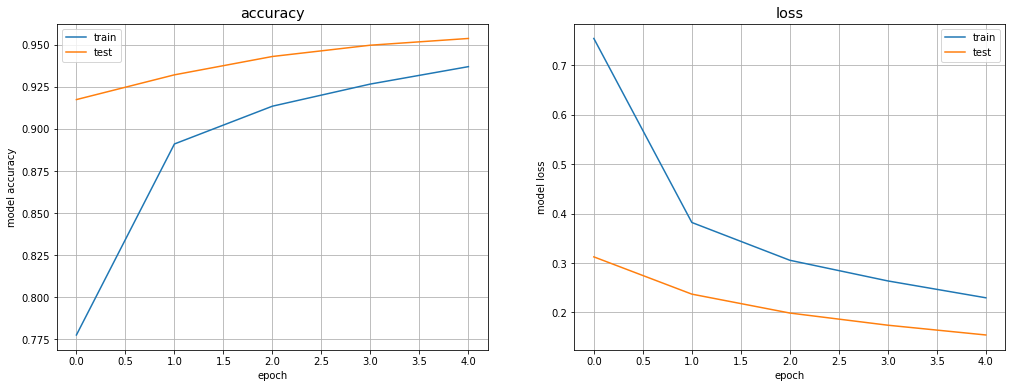

*******************************************************
Model performance:
– Test loss: 0.15445300706624984
– Test accuracy: 0.9537000060081482
*******************************************************


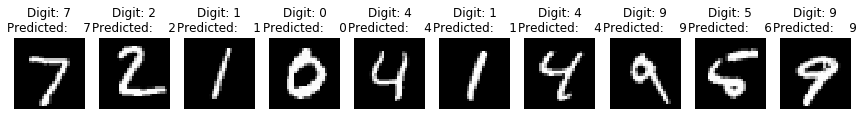

In [135]:
plt.rcParams['figure.figsize'] = [17, 6]
fig, ax = plt.subplots(1,2)

hist=['accuracy', 'loss'] 
val_hist=['val_accuracy', 'val_loss']

# summarize history for accuracy and loss
for i in range(2):
    ax[i].plot(history.history[hist[i]])
    ax[i].plot(history.history[val_hist[i]])
    ax[i].set_ylabel('model '+hist[i])
    ax[i].set_xlabel('epoch')
    ax[i].legend(['train', 'test'], loc='best')
    ax[i].grid()
    ax[i].set_title(hist[i], size='x-large')
plt.show()

score = model_DNN.evaluate(X_test, Y_test, verbose=0)
printscore(score)

predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

### Comparison with other optimizers: Adam, RMSprop, Adagrad, Adadelta

SGD
*******************************************************
Model performance:
– Test loss: 0.15445300706624984
– Test accuracy: 0.9537000060081482
*******************************************************
Processing time ~  17s (15s-19s)
*******************************************************


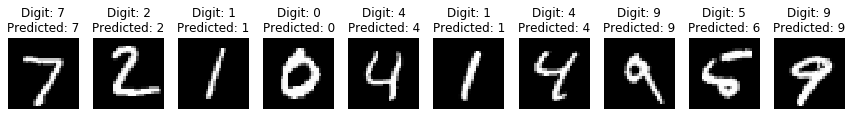

Adam
*******************************************************
Model performance:
– Test loss: 0.07339966119860619
– Test accuracy: 0.9785
*******************************************************
Processing time ~  40s (37s-42s)
*******************************************************


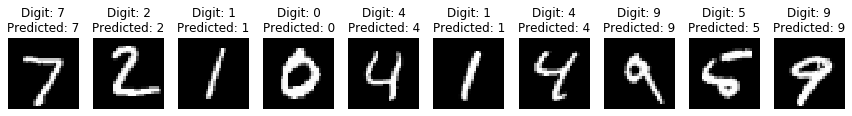

RMS
*******************************************************
Model performance:
– Test loss: 0.1521402207668085
– Test accuracy: 0.9736
*******************************************************
Processing time ~  30s (29s-33s)
*******************************************************


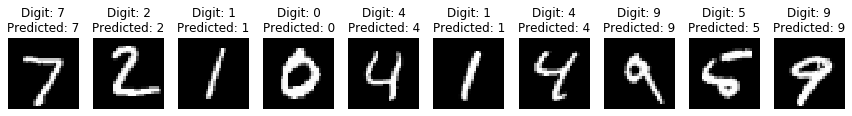

Adagrad
*******************************************************
Model performance:
– Test loss: 0.0721126351832645
– Test accuracy: 0.9776
*******************************************************
Processing time ~  27s (26s-30s)
*******************************************************


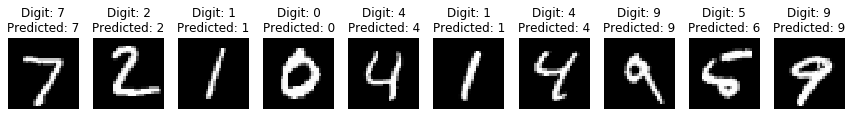

Adadelta
*******************************************************
Model performance:
– Test loss: 0.07411782581719017
– Test accuracy: 0.9806
*******************************************************
Processing time ~  50s (46s-52s)
*******************************************************


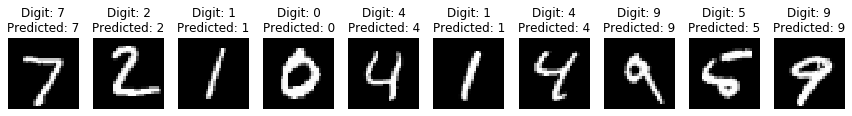

In [136]:
from tensorflow.keras.models import load_model
models=['SGD', 'Adam', 'RMS','Adagrad','Adadelta']
times=['17s (15s-19s)','40s (37s-42s)','30s (29s-33s)','27s (26s-30s)','50s (46s-52s)']


for m in range(5):
    print(models[m])
    if (m>0):
        model_DNN=load_model('Models_12-1/model_'+models[m])
    score = model_DNN.evaluate(X_test, Y_test, verbose=0)
    printscore(score)
    print("Processing time ~ ", times[m])
    print('*******************************************************')
    predictions = model_DNN.predict(X_test)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
    
    fig = plt.figure(figsize=(15, 15))
    for i in range(10):    
        ax = plt.subplot(3, 10, i + 1)    
        plt.imshow(X_test[i, :, :, 0], cmap='gray')    
        plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
        plt.axis('off') 
    plt.show()
    X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

From these results we can then conclude that smaller values of loss and higher values of accuracy are directly related to more time involved to run each epoch.

Anyway we can notice that all the optimizers work very well (accurancy > $95 \%$), recognising all the digits except for SGD and Adagrad that do not predict a bad written 5.

It is then up to the programmer choose between accurancy and computational efficiency according to the model one is working on.

I would choose Adagrad as compromise, because it is the second faster optimizer, has a high accurancy and a very low loss.

## 12.2) Convolutional Neural Network

A CNN is a specific kind of DNN, which is used mainly in classification of images. It basically takes advantages of local correlation among pixels properties in order to reach the translational invariance. In other words, it can recognise the object even if it is in a different position with respect to the images the CNN was trained on. This leads to better results and is also less computational expensive.

Its architecture has to be composed of an alternance of convolution layers, which compute the convolution of the input with a serie of filters, and pooling layers, which coarse-grain the input maintaining locality and spatial structure.

Trying different combinations, I finally found good results with the following architecture:

- **Convolution**: 10 filters of 5x5 with $s=1$ (dimension of image: $28x28x1 \rightarrow 24x24x10$)
- **MaxPooling**: a filter of 2x2 with $s=2$ ($24x24x10 \rightarrow 12x12x10$)
- **Convolution**: 18 filters of 5x5 with $s=1$ ($12x12x10 \rightarrow 8x8x18$)
- **MaxPooling**: a filter of 2x2 with $s=2$ ($8x8x18 \rightarrow 4x4x18$)
- **Flatten**: unroll the 3D parameters $\rightarrow 4x4x18=288$
- **Dense**: fully connected layer with activation function='relu'
- **Dropout**: 0.5 of neurons to reduce risk of overfitting
- output: 10 digits with activation function='softmax'.

In [145]:
from keras.layers import Flatten, Conv2D, MaxPooling2D

###### DATA ##########################################
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
###### CNN ##########################################
def create_CNN():
    # instantiate model
    model = Sequential()
    #--> 28x28x1
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    #--> 24x24x10
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    #--> 12x12x10
    model.add(Conv2D(18, kernel_size=(5,5)))
    #-->8x8x18
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    #-->4x4x18=288
    model.add(Flatten())
    model.add(Dense(288, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adagrad', metrics=['accuracy'])
    
    return model

print('Model architecture created successfully!')
print('Model compiled successfully and ready to be trained.')
print()

###### TRAINING ##########################################
batch_size = 32
epochs = 5

model_CNN=create_CNN()

history_CNN=model_CNN.fit(X_train, Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, Y_test))

Model architecture created successfully!
Model compiled successfully and ready to be trained.

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 89s 1ms/step - loss: 0.1772 - accuracy: 0.9458 - val_loss: 0.0631 - val_accuracy: 0.9796
Epoch 2/5
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0815 - accuracy: 0.9754 - val_loss: 0.0477 - val_accuracy: 0.9851
Epoch 3/5
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0648 - accuracy: 0.9801 - val_loss: 0.0405 - val_accuracy: 0.9865
Epoch 4/5
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0580 - accuracy: 0.9827 - val_loss: 0.0362 - val_accuracy: 0.9872
Epoch 5/5
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0513 - accuracy: 0.9844 - val_loss: 0.0342 - val_accuracy: 0.9885


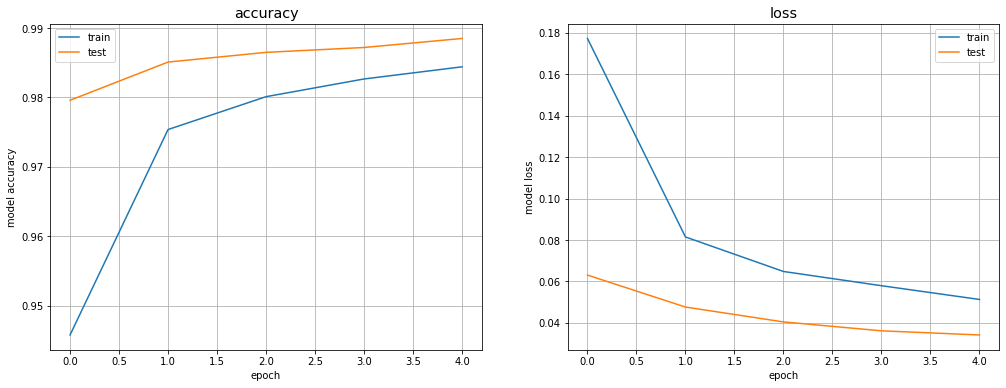

*******************************************************
Model performance:
– Test loss: 0.03418275633137673
– Test accuracy: 0.9884999990463257
*******************************************************


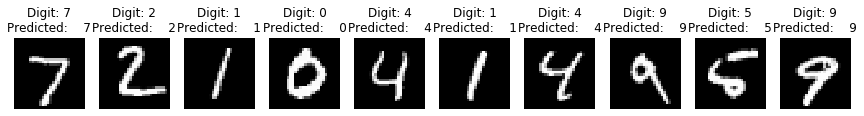

In [146]:
###### PERFORMANCE ##########################################
plt.rcParams['figure.figsize'] = [17, 6]
fig, ax = plt.subplots(1,2)

hist=['accuracy', 'loss'] 
val_hist=['val_accuracy', 'val_loss']

# summarize history for accuracy and loss
for i in range(2):
    ax[i].plot(history_CNN.history[hist[i]])
    ax[i].plot(history_CNN.history[val_hist[i]])
    ax[i].set_ylabel('model '+hist[i])
    ax[i].set_xlabel('epoch')
    ax[i].legend(['train', 'test'], loc='best')
    ax[i].grid()
    ax[i].set_title(hist[i], size='x-large')
plt.show()

score = model_CNN.evaluate(X_test, Y_test, verbose=0)
printscore(score)

predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

We can notice that thanks to CNN the model now recognises the digit ($6 \rightarrow 5$) it couldn't before with the DNN.

## 12.3) Our handwritten digits

We are finally asked to verify the performance of the CNN we implemented using our own handwritten digits.

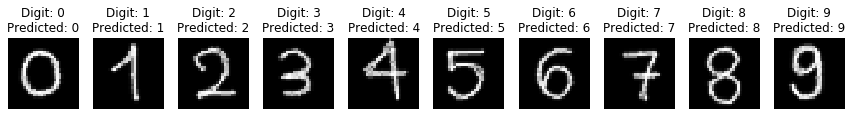

In [147]:
 from PIL import Image
    
plt.figure(figsize=(15,15))

for d in range(10): 
    digit_filename = "MyDigits/"+str(d)+".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    #print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]
    data /= 255
    ax = plt.subplot(3, 10, d + 1) 
    plt.imshow(data, cmap='gray')
    #plt.imshow(X_test[i, :, :, 0], cmap='gray') 
    data = data.reshape(1, img_rows, img_cols, 1)
    prediction=model_CNN.predict(data)
    plt.title("Digit: "+str(d)+"\nPredicted: "+str(np.argmax(prediction)))   
    plt.axis('off') 
plt.show()

We can then conclude that the implemented CNN leads to an excellent model performance.